In [2]:
import os
import cv2
import tqdm
import pickle
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from utils.dataset_utils_velocity import *
from collections import defaultdict
from deep_sort_realtime.deepsort_tracker import DeepSort

In [3]:
raw_video_folder = r'..\data\raw\pred_prey_interaction'
yolo_path = r'..\models\costumized_yolo\costumized_yolo\costumized_yolo.pt'
processed_video_folder = r'..\data\processed\pred_prey_interactions'

In [13]:
model = YOLO(yolo_path)
tracker = DeepSort(max_age=30)

num_frames=1
total_detections=33
all_speeds = []

for video in os.listdir(raw_video_folder):

    print(f"\nProcessing {video}...")

    # Load the video
    video_path = os.path.join(raw_video_folder, video)
    cap = cv2.VideoCapture(video_path)
    total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    
    # total_frames
    os.makedirs(os.path.join(processed_video_folder, "total_frames"), exist_ok=True)
    tf_path = os.path.join(processed_video_folder, "total_frames", f"total_frames_{video}.pkl")

    if os.path.exists(tf_path):
        with open(tf_path, "rb") as f:
            total_frames = pickle.load(f)
    else:
        total_frames = []
        for frame in tqdm.tqdm(range(total_frame_count), desc="Processing frames"):
            frame_records = process_frame(cap, model, tracker, frame)
            total_frames.extend(frame_records)
        cap.release()
        with open(tf_path, "wb") as f:
            pickle.dump(total_frames, f)


    speeds = [det["speed"] for det in total_frames]
    all_speeds.extend(speeds)


Processing pred_prey_interaction_0.07.mp4...

Processing pred_prey_interaction_0.14.mp4...

Processing pred_prey_interaction_0.15.mp4...

Processing pred_prey_interaction_0.16.mp4...

Processing pred_prey_interaction_0.17.mp4...

Processing pred_prey_interaction_0.24.mp4...

Processing pred_prey_interaction_0.27.mp4...

Processing pred_prey_interaction_0.36.mp4...

Processing pred_prey_interaction_0.41.mp4...

Processing pred_prey_interaction_1.01.mp4...

Processing pred_prey_interaction_1.07.mp4...

Processing pred_prey_interaction_1.09.mp4...

Processing pred_prey_interaction_1.11.mp4...

Processing pred_prey_interaction_1.20.mp4...

Processing pred_prey_interaction_1.28.mp4...

Processing pred_prey_interaction_1.30.mp4...

Processing pred_prey_interaction_1.50.mp4...

Processing pred_prey_interaction_1.52.mp4...

Processing pred_prey_interaction_1.53.mp4...

Processing pred_prey_interaction_1.54.mp4...

Processing pred_prey_interaction_16.02.mp4...

Processing pred_prey_interaction

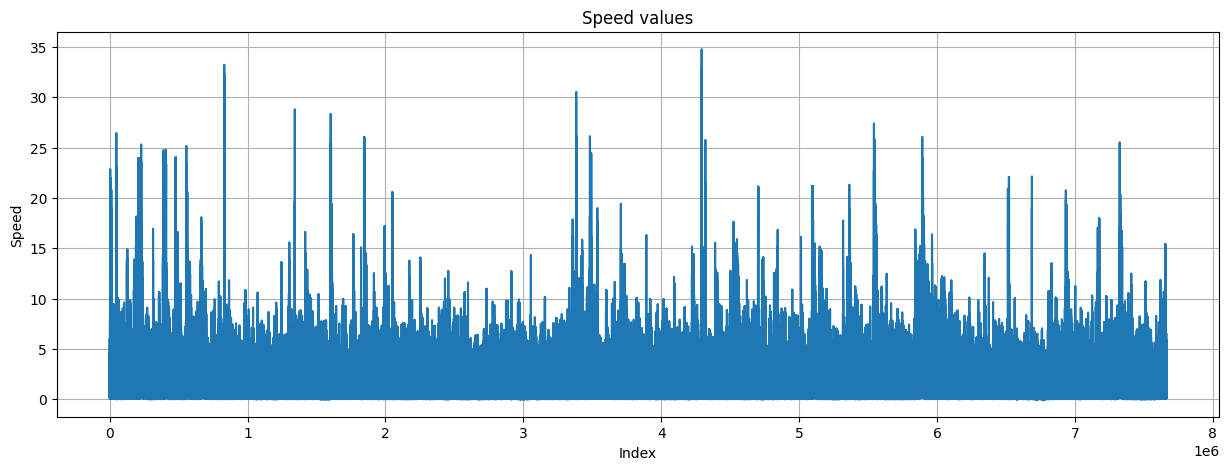

In [19]:
plt.figure(figsize=(15,5))
plt.plot(all_speeds)
plt.title("Speed values")
plt.xlabel("Index")
plt.ylabel("Speed")
plt.grid(True)
plt.show()

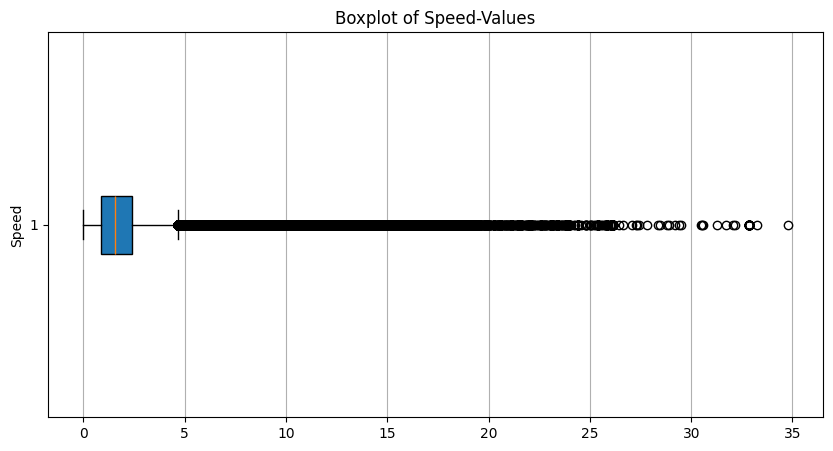

In [22]:
plt.figure(figsize=(10,5))
plt.boxplot(all_speeds, vert=False, patch_artist=True)
plt.title("Boxplot of Speed-Values")
plt.ylabel("Speed")
plt.grid(True, axis='x')
plt.show()